### Продвинутое машинное обучение: 
### Домашнее задание 3

Третье домашнее задание посвящено достаточно простой, но, надеюсь, интересной задаче, в которой потребуется творчески применить методы сэмплирования. Как и раньше, в качестве решения ожидается ссылка на jupyter-ноутбук на вашем github (или публичный, или с доступом для snikolenko); ссылку обязательно нужно прислать в виде сданного домашнего задания на портале Академии. Как всегда, любые комментарии, новые идеи и рассуждения на тему категорически приветствуются. 
В этом небольшом домашнем задании мы попробуем улучшить метод Шерлока Холмса.

Пользовался он для этого так называемым частотным методом: смотрел, какие буквы чаще встречаются в зашифрованных текстах, и пытался подставить буквы в соответствии с частотной таблицей: E — самая частая и так далее.
В этом задании мы будем разрабатывать более современный и продвинутый вариант такого частотного метода. В качестве корпусов текстов для подсчётов частот можете взять что угодно, но для удобства вот вам “Война и мир” по-русски и по-английски:



### 1 Реализуйте базовый частотный метод по Шерлоку Холмсу:
- подсчитайте частоты букв по корпусам (пунктуацию и капитализацию можно просто опустить, а вот пробелы лучше оставить);
- возьмите какие-нибудь тестовые тексты (нужно взять по меньшей мере 2-3 предложения, иначе вряд ли сработает), зашифруйте их посредством случайной перестановки символов;
- расшифруйте их таким частотным методом.


In [26]:
from collections import Counter, defaultdict
import re
import random
from copy import copy

from collections import Counter
import pandas as pd
import numpy as np
from nltk import everygrams
from tqdm import tqdm
from typing import List

import matplotlib.pyplot as plt
import warnings
from multiprocessing import Pool
from functools import reduce

warnings.filterwarnings("ignore")

In [27]:
TOKENS = "абвгдежзийклмнопрстуфхцчшщъыьэюя "
TOKENS_LIST = list(TOKENS)

**В качестве основного корпуса будем использовать произведение "Война и Мир" , а для расшифровки будем использовать произведение "Анна Каренина"**

In [28]:
data_path_anna_kerenina = "./data/AnnaKarenina.txt"
data_path_war_and_piece = "./data/WarAndPeace.txt"

In [29]:
with open(data_path_anna_kerenina, "r") as f:
    anna_kerenina_text = f.read().lower()
    anna_kerenina_text_filtered = "".join(
        [token for token in anna_kerenina_text if token.lower() in TOKENS_LIST]
    )
    anna_kerenina_counter = Counter(anna_kerenina_text_filtered)

In [30]:
with open(data_path_war_and_piece, "r") as f:
    war_and_piece_text = f.read().lower()
    war_and_piece_text_filtered = "".join(
        [token for token in war_and_piece_text if token.lower() in TOKENS_LIST]
    )
    war_and_piece_counter = Counter(war_and_piece_text_filtered)

In [31]:
def count_letters(counter):
    number = 0
    for i in range(len(TOKENS_LIST)):
        number += counter[TOKENS_LIST[i]]
    return number


def frequency(number, counter):
    arr_frequency = []
    for i in range(len(TOKENS_LIST)):
        ratio = counter[TOKENS_LIST[i]] / number * 100
        arr_frequency.append(ratio)
    return arr_frequency


def accuracy(text, decoded_text):
    assert len(text) == len(decoded_text)
    true_token = 0
    for t1, t2 in zip(text, decoded_text):
        true_token += int(t1 == t2)
    return true_token / len(text)

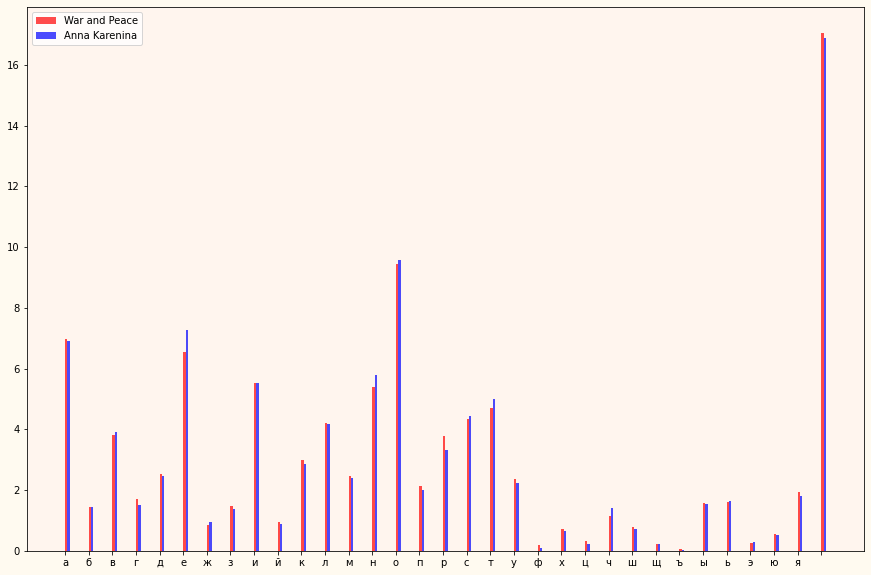

In [32]:
count_anna_kerenina = count_letters(anna_kerenina_counter)
count_war_and_piece = count_letters(war_and_piece_counter)

fig, ax = plt.subplots()

xs = range(len(TOKENS_LIST))

ax.bar(
    [x + 0.05 for x in xs],
    frequency(count_war_and_piece, war_and_piece_counter),
    width=0.1,
    color="red",
    alpha=0.7,
    label="War and Peace",
    zorder=2,
)

ax.bar(
    [x + 0.15 for x in xs],
    frequency(count_anna_kerenina, anna_kerenina_counter),
    width=0.1,
    color="blue",
    alpha=0.7,
    label="Anna Karenina",
    zorder=2,
)

plt.xticks(xs, TOKENS_LIST)
ax.set_facecolor("seashell")
fig.set_figwidth(15)
fig.set_figheight(10)
fig.set_facecolor("floralwhite")
plt.legend()

**Мы видим, что частота появления токенов в двух произведениях примерно одинаковая и использование одного произведения для нахождения частотности токенов уместно**

**Зашифруем отрывок из произведения Анна Каренина**

In [33]:
def cipher(text):
    original_tokens = TOKENS_LIST
    encoded_tokens = np.random.choice(
        original_tokens, replace=False, size=len(original_tokens)
    )
    encoder = dict()

    for original_token, encoded_token in zip(original_tokens, encoded_tokens):
        encoder[original_token] = encoded_token

    encoded_text = "".join(
        [encoder[token] if token in encoder else token for token in text]
    )
    return encoded_text

In [34]:
text = "анна каренина один из самых знаменитых романов льва толстого начинается ставшей афоризмом фразой все счастливые семьи похожи друг на друга каждая несчастливая семья несчастлива посвоему это книга о вечных ценностях о любви о вере о семье о человеческом достоинстве  лев толстойроман широкого дыханиячасть перваялев толстойанна каренинароман широкого дыханияанна каренина поразила современников вседневностью содержания необычайная свобода раскованность повествования удивительно сочетались в этом романе с цельностью художественного взгляда автора на жизнь он выступал здесь как художник и мыслитель и назначение искусства видел не в том чтобы неоспоримо разрешить вопрос а в том чтобы заставить любить жизнь в бесчисленных никогда не истощимых всех ее проявлениях  в е годы один маститый писатель повидимому гончаров сказал достоевскому это вещь неслыханная это вещь первая кто у нас из писателей может поравняться с этим а в европе  кто представит хоть чтонибудь подобное фм достоевский находил в новом романе толстого огромную психологическую разработку души человеческой страшную глубину и силу и главное небывалый доселе у нас реализм художественного изображениявремя подтвердило эту высокую оценку из статей и книг на всех языках мира посвященных анне карениной можно составить целую библиотеку я без колебаний назвал анну каренину величайшим социальным романом во всей мировой литературе  писал томас маннзначение романа толстого состоит не в эстетической ценности отдельных картин а в художественной завершенности целоговойну и мир толстой называл книгой о прошлом в начале  года он просил редактора журнала русский вестник мн каткова в оглавлении и даже в объявлении не называть его сочинение романом для меня это очень важно и потому очень прошу вас об этом   толстой мог бы обосновать свое определение жанра книга ссылкой на гегеля которого он внимательно перечитывал в годы работы над войной и миром гегель называл книгой эпические произведения связанные с целостным миром определенного народа и определенной эпохи книга или самобытная эпопея дает картину национального самосознания в нравственных устоях семейной жизни в общественных условиях состояния войны и мира курсив наш "
text.lower()

'анна каренина один из самых знаменитых романов льва толстого начинается ставшей афоризмом фразой все счастливые семьи похожи друг на друга каждая несчастливая семья несчастлива посвоему это книга о вечных ценностях о любви о вере о семье о человеческом достоинстве  лев толстойроман широкого дыханиячасть перваялев толстойанна каренинароман широкого дыханияанна каренина поразила современников вседневностью содержания необычайная свобода раскованность повествования удивительно сочетались в этом романе с цельностью художественного взгляда автора на жизнь он выступал здесь как художник и мыслитель и назначение искусства видел не в том чтобы неоспоримо разрешить вопрос а в том чтобы заставить любить жизнь в бесчисленных никогда не истощимых всех ее проявлениях  в е годы один маститый писатель повидимому гончаров сказал достоевскому это вещь неслыханная это вещь первая кто у нас из писателей может поравняться с этим а в европе  кто представит хоть чтонибудь подобное фм достоевский находил в 

In [35]:
encoded_text = cipher(text.lower())
encoded_text

'куукяиквфупукящепуяпыяакюмцяыукюфупнмцявщюкущчяхжчкянщханщзщяукьпукфнаэяанкчбфгякйщвпыющюяйвкыщгячафяаьканхпчмфяафюжпялщцщшпяеврзяукяеврзкяикшекэяуфаьканхпчкэяафюжэяуфаьканхпчкялщачщфюря нщяиупзкящячфьумцядфуущанэцящяхотчпящячфвфящяафюжфящяьфхщчфьфаищюяещанщпуанчфяяхфчянщханщгвщюкуябпвщищзщяемцкупэьканжялфвчкэхфчянщханщгкуукяиквфупуквщюкуябпвщищзщяемцкупэкуукяиквфупукялщвкыпхкяащчвфюфуупищчячафеуфчущанжояащефвшкупэяуфщтмькгукэяачщтщекявкаищчкуущанжялщчфанчщчкупэярепчпнфхжущяащьфнкхпажячя нщюявщюкуфяаядфхжущанжояцрещшфанчфуущзщячызхэекякчнщвкяукяшпыужящуячманрлкхяыефажяикияцрещшупияпяюмахпнфхжяпяукыукьфупфяпаираанчкячпефхяуфячянщюяьнщтмяуфщалщвпющявкывфбпнжячщлвщаякячянщюяьнщтмяыканкчпнжяхотпнжяшпыужячятфаьпахфуумцяупищзекяуфяпанщъпюмцячафцяффялвщэчхфупэцяячяфязщемящепуяюканпнмгялпакнфхжялщчпепющюрязщуьквщчяаикыкхяещанщфчаищюря нщячфъжяуфахмцкуукэя нщячфъжялфвчкэяинщяряукаяпыялпакнфхфгяющшфнялщвкчуэнжаэяая нпюякячяфчвщлфяяинщялвфеанкчпняцщнжяьнщуптрежялщещтущфяйюяещанщфчаипгяукцщепхячя

**Для дешифровки  воспользуемся произведением "Война и Мир", чтобы получить частотность токенов на русском языке**

In [36]:
war_and_piece_counter_tokens = {
    key: value for (key, value) in war_and_piece_counter.items() if key in TOKENS_LIST
}
war_and_piece_counter_tokens_sorted = sorted(
    war_and_piece_counter_tokens.items(), key=lambda x: x[1], reverse=True
)
war_and_piece_counter_tokens_sorted = [
    t[0] for t in war_and_piece_counter_tokens_sorted
]

In [37]:
def decrypt_text(encoded_text, decrypt_keys):
    encoded_text_counter = Counter(encoded_text)
    encoded_text_counter_tokens = {
        key: value
        for (key, value) in encoded_text_counter.items()
        if key in TOKENS_LIST
    }
    encoded_text_counter_sorted = sorted(
        encoded_text_counter_tokens.items(), key=lambda x: x[1], reverse=True
    )
    encoded_text_counter_sorted = [t[0] for t in encoded_text_counter_sorted]

    if len(decrypt_keys) != len(encoded_text_counter_sorted):
        raise Exception(
            f"len decrypt_keys [{len(decrypt_keys)}] and encoded_keys [{len(encoded_text_counter_sorted)}] has different size!"
        )

    dictionary = dict(zip(encoded_text_counter_sorted, decrypt_keys))
    decoded_tokens = []

    for i in encoded_text:
        decoded_tokens.append(dictionary.get(i, i))

    decoded_text = "".join(decoded_tokens)

    return decoded_text

In [38]:
decoded_text = decrypt_text(encoded_text, war_and_piece_counter_tokens_sorted)
decoded_text

'иааи дивеанаи омна нб тикпч баикеанспч вокиаол рьли сортсояо аийнаиестг тсилюез ифовнбкок фвибоз лте тйитсрнлпе текьн ыочошн мвуя аи мвуяи дишмиг аетйитсрнлиг текьг аетйитсрнли ыотлоеку хсо даняи о лейапч цеааотсгч о рэжлн о леве о текье о йеролейетдок мотсонатсле  рел сортсозвокиа юнводояо мпчиангйитсь ыевлигрел сортсозиааи дивеанаивокиа юнводояо мпчиангиааи дивеанаи ыовибнри толвекеаандол лтемаелаотсьэ томевшианг аеожпйизаиг тложоми витдолиааотсь ыолетслолианг умнлнсерьао тойесирнть л хсок вокиае т церьаотсьэ чумошетслеааояо лбяргми илсови аи шнбаь оа лптсуыир бметь дид чумошанд н кптрнсерь н аибаийеане нтдуттсли лнмер ае л сок йсожп аеотыовнко вибвеюнсь лоывот и л сок йсожп битсилнсь рэжнсь шнбаь л жетйнтреаапч андоями ае нтсощнкпч лтеч ее ывоглреангч  л е яомп омна китснспз ынтисерь ыолнмнкоку яоайивол тдибир мотсоелтдоку хсо лещь аетрпчиааиг хсо лещь ыевлиг дсо у аит нб ынтисерез кошес ыовилагсьтг т хснк и л елвоые  дсо ывемтсилнс чось йсоанжумь ыоможаое фк мотсоелтднз аичомнр л 

In [39]:
accuracy(text.lower(), decoded_text)

0.3561643835616438

**Думал будет хуже, но все равно данный метод плох, когда зашифрованное сообщение маленькое и распределение частоты токенов совсем не совпадает с распределением подсчитанным на большом произведении.**

### 2 Частоты биграмм 
Вряд ли в результате получилась такая уж хорошая расшифровка, разве что если вы брали в качестве тестовых данных целые рассказы. Но и Шерлок Холмс был не так уж прост: после буквы E, которая действительно выделяется частотой, дальше он анализировал уже конкретные слова и пытался угадать, какими они могли бы быть. Я не знаю, как запрограммировать такой интуитивный анализ, так что давайте просто сделаем следующий логический шаг:
- подсчитайте частоты биграмм (т.е. пар последовательных букв) по корпусам;
- проведите тестирование аналогично п.1, но при помощи биграмм.


**Подсчитаем n-gram  для основного произведения "Война и Мир" и отсортируем по частотности токенов**

In [40]:
n_gram = 2
war_and_piece_text_n_gram = [
    "".join(ngram)
    for ngram in everygrams(war_and_piece_text_filtered, min_len=n_gram, max_len=n_gram)
]
war_and_piece_counter_tokens_sorted_n_gram = sorted(
    Counter(war_and_piece_text_n_gram).items(), key=lambda x: x[1], reverse=True
)
war_and_piece_counter_tokens_sorted_n_gram = [
    t[0] for t in war_and_piece_counter_tokens_sorted_n_gram
]

In [41]:
def decrypt_text_by_n_gram(encoded_text, decrypt_keys, n_gram=2):
    encoded_text_n_gram = [
        "".join(ngram)
        for ngram in everygrams(encoded_text, min_len=n_gram, max_len=n_gram)
    ]
    encoded_text_counter_sorted = sorted(
        Counter(encoded_text_n_gram).items(), key=lambda x: x[1], reverse=True
    )
    encoded_text_counter_sorted = [t[0] for t in encoded_text_counter_sorted]

    decrypt_keys_short = decrypt_keys[: len(encoded_text_counter_sorted)]

    if len(decrypt_keys_short) != len(encoded_text_counter_sorted):
        raise Exception(
            f"len decrypt_keys [{len(decrypt_keys)}] and encoded_keys [{len(encoded_text_counter_sorted)}] has different size!"
        )

    dictionary = dict(zip(encoded_text_counter_sorted, decrypt_keys_short))
    decoded_tokens = []

    prev_exist = False
    prev_n_gram = "  "
    for i in encoded_text_n_gram:
        if prev_exist:
            decoded_tokens.append(prev_n_gram[1])
            prev_exist = False
            if i in dictionary:
                prev_exist = True
                prev_n_gram = dictionary.get(i)
        else:
            if i in dictionary:
                decoded_tokens.append(dictionary.get(i)[0])
                prev_exist = True
                prev_n_gram = dictionary.get(i)
            else:
                decoded_tokens.append(dictionary.get(i)[0])
                prev_exist = False

    decoded_text = "".join(decoded_tokens)

    return decoded_text + " "

**Попробуем расшифровать загодированное сообщение**

In [42]:
decoded_text_n_gram = decrypt_text_by_n_gram(
    encoded_text, war_and_piece_counter_tokens_sorted_n_gram
)
decoded_text_n_gram

' ил пол двси птнеиеамдоааыенвь аевсррен акаи тоитибпк зс  н  н еди доукво нгк э тусихмпскоиюреь   м ооиеч цдейзоо гафеоо уядеметвсн пметврполяйатвнитиеч цдебтво галвнитиеч цдебпооадгмгвлае  орссрпт  окш еняьвл а вкнт ияби ет  ойдот о гасот еа ттокатлркомза  аип еооии аок зс   иакаиехлыанрн  мпесискюеч иооййабтч аок зс   шил пол двси  акаиехлыанрн  мпесискуил пол двси пооиредихпоетрдгевлсжрто м  лиаз а икноенойннисквникьеченн тводгьинап рчлртбил а иооотот егтбискворее ру тм  оенаонсд ьо оае ко акаииооояь тм а икнолрзяет еовл н   оуувбаптгр ирпн плдмьжотые йа чдссрвыотьоолюшолрзяжсжшаеаыаядру тоаен еь еавсуоа луя  ебп  мо рнио ок коеш ьебникаиоихус  решдщлрио гв ааотп ок коеш ьебвыч нг риоиябгриолдмьжо озмтид я вл еннсжрннапниоа   тиуыен м шнуиоо аырж всккни оуои нпбтнеиеаач ыррх он аву тооот меусквли ыде атооллеысрмза  мамлрквлае   оагонитяпесил твае   оагооййабтвое  олн чоамдон аву  э асяеойооиргзжыияквооаеыуотп оуаравйоиое  о д н нг рйоуяиоеш ысллртооонзьь моиромза  мамлуч н еунеир о

In [43]:
accuracy(text.lower(), decoded_text_n_gram)

0.07671232876712329

**Очевидный результат т.к. кол-во токенов (биграмм) стало еще больше и если распределение для одного символа в маленьком сообщении было нерелевантным , то когда разделили на биграммы , то ситуация стала еще хуже.**

### 3 MCMC-сэмплировании
Но и это ещё не всё: биграммы скорее всего тоже далеко не всегда работают. Основная часть задания — в том, как можно их улучшить:
- предложите метод обучения перестановки символов в этом задании, основанный на MCMC-сэмплировании, но по-прежнему работающий на основе статистики биграмм;
- реализуйте и протестируйте его, убедитесь, что результаты улучшились.


В качестве вдохновения мне помогли след. источники:
- [Applications of MCMC for Cryptography and Optimization](https://towardsdatascience.com/applications-of-mcmc-for-cryptography-and-optimization-1f99222b7132)
- [MCMC-сэмплинг для тех, кто учился, но ничего не понял](https://habr.com/en/company/wunderfund/blog/279545/)

Алгоритм:
- считаем p score для текста сисходным маппигом (p_current)
- перестанавливаем произвольно два токена 
- пробуем рашифровать и считаем p score (p_proposal)
- если p_proposal больше, чем p_current, полученная вероятность будет больше 1, и такое предложение мы, определённо, примем. Однако, если p_current больше чем p_proposal, скажем, в два раза, шанс перехода будет составлять уже 50%.

- пробуем менять произвльно буквы n steps (steps) выбираем лучший результат 

Но т.к. это жадный алгоритм и можем забрести не туда, то делаем несколько итераций алгоритма




In [44]:
def calculate_p_tokens(text, n_gram=2):
    n_gram_size = len(set(text)) ** n_gram

    n_grams = [
        "".join(token) for token in everygrams(text, min_len=n_gram, max_len=n_gram)
    ]

    p_n_grams = {k: v / n_gram_size for k, v in Counter(n_grams).items()}

    return p_n_grams

In [45]:
def calculate_p_score(text, decoder, p_tokens, n_gram=2):
    decoded_text = "".join([decoder.get(t, " ") for t in text])

    p_log = 0.0

    for i in range(len(decoded_text) - n_gram):
        token = decoded_text[i : i + n_gram]
        p_log += np.log(p_tokens.get(token, 0.0001))

    return p_log

In [46]:
def mcmc_decoder(
    encoded_text: str,
    tokens_encoder: List[str],
    tokens_decoder: List[str],
    p_tokens,
    iters=5,
    steps=1500,
    n_gram=2,
):

    p_prev = -float("inf")
    selected_encoder_decoder = dict()

    for _ in range(iters):

        current_token_decoder = tokens_decoder.copy()

        decoder_encoder = dict()

        for token_encoder, token_decoder in zip(
            tokens_encoder, current_token_decoder[: len(tokens_encoder)]
        ):
            decoder_encoder[token_encoder] = token_decoder

        p_current = calculate_p_score(
            encoded_text, decoder_encoder, p_tokens, n_gram=n_gram
        )

        for _ in range(steps):
            decoder_proposal = current_token_decoder.copy()

            idx1, idx2 = np.random.choice(len(decoder_proposal), replace=False, size=2)

            decoder_proposal[idx1], decoder_proposal[idx2] = (
                decoder_proposal[idx2],
                decoder_proposal[idx1],
            )

            decoder_encoder_proposal = dict()

            for token_encoder, token_decoder in zip(
                tokens_encoder, decoder_proposal[: len(tokens_encoder)]
            ):
                decoder_encoder_proposal[token_encoder] = token_decoder

            p_proposal = calculate_p_score(
                encoded_text, decoder_encoder_proposal, p_tokens, n_gram=n_gram
            )

            # если p_proposal больше, чем p_current, полученная вероятность будет больше 1, и такое предложение мы, определённо, примем.
            # Однако, если p_current больше чем p_proposal, скажем, в два раза, шанс перехода будет составлять уже 50%:

            accept = np.exp(p_proposal - p_current) > np.random.rand()

            if accept:
                current_token_decoder = decoder_proposal
                p_current = p_proposal
                decoder_encoder = decoder_encoder_proposal

        if p_current > p_prev:
            selected_encoder_decoder = decoder_encoder
            p_prev = p_current

    decoded_text = "".join([selected_encoder_decoder.get(t, " ") for t in encoded_text])

    return decoded_text, p_prev

In [47]:
p_tokens = calculate_p_tokens(war_and_piece_text_filtered, n_gram=2)

mcmc_decoded_text, _ = mcmc_decoder(
    encoded_text=encoded_text,
    tokens_encoder=TOKENS_LIST,
    tokens_decoder=TOKENS_LIST,
    p_tokens=p_tokens,
)

In [48]:
mcmc_decoded_text

'анна каренина обин из садых знаденитых роданов льва толстого начинаетсм ставщей аяориздод яразой все счастливые седьи похожи бруг на бруга кажбам несчастливам седьм несчастлива посвоеду это книга о вечных фенностмх о люцви о вере о седье о человеческод бостоинстве  лев толстойродан щирокого быханимчасть первамлев толстойанна каренинародан щирокого быханиманна каренина поразила совреденников всебневностью собержаним неоцычайнам своцоба раскованность повествованим убивительно сочетались в этод родане с фельностью хубожественного взглмба автора на жизнь он выступал збесь как хубожник и дыслитель и назначение искусства вибел не в тод чтоцы неоспоридо разрещить вопрос а в тод чтоцы заставить люцить жизнь в цесчисленных никогба не истошидых всех ее промвленимх  в е гобы обин даститый писатель повибидоду гончаров сказал бостоевскоду это вешь неслыханнам это вешь первам кто у нас из писателей дожет поравнмтьсм с этид а в европе  кто пребставит хоть чтоницубь побоцное яд бостоевский нахобил в 

In [49]:
accuracy(text.lower(),mcmc_decoded_text)

0.9114155251141552

**Это невероятный результат, мы смогли раcшифровать закодированное сообщение с маленькой длиной**

**Но интересно попробовать распараллелить алгоритм.  Для этой задачи использовал Pool, который задается параметром n_jobs**

In [50]:
def mcmc_decoder_parallelize(
    encoded_text: str,
    tokens_encoder: List[str],
    tokens_decoder: List[str],
    p_tokens,
    iters=5,
    steps=4000,
    n_gram=2,
    n_jobs=4,
):
    with Pool(processes=n_jobs) as pool:
        params = (
            encoded_text,
            tokens_encoder,
            tokens_decoder,
            p_tokens,
            1,
            steps,
            n_gram,
        )
        reponse = pool.starmap(mcmc_decoder, [params] * iters)
        reponse.sort(key=lambda tup: tup[1], reverse=True)
        return reponse[0][0]

In [51]:
mcmc_decoded_text_parallelize = mcmc_decoder_parallelize(
    encoded_text=encoded_text,
    tokens_encoder=TOKENS_LIST,
    tokens_decoder=TOKENS_LIST,
    p_tokens=p_tokens,
    iters=10,
    n_jobs=10,
)

In [52]:
mcmc_decoded_text_parallelize

'анна каленина один из тамых знаменирых ломанов сьва рострого начинаертя травшей афолизмом флазой вте тчатрсивые темьи похожи длуг на длуга каждая нетчатрсивая темья нетчатрсива потвоему эро книга о вечных ценнотрях о сюбви о веле о темье о чесовечетком дотроинтрве  сев ростройломан шилокого дыханиячатрь пелваясев ростройанна калениналоман шилокого дыханияанна каленина полазиса товлеменников втедневнотрью тоделжания необычайная твобода латкованнотрь поветрвования удивиресьно точерасить в эром ломане т цесьнотрью художетрвенного взгсяда аврола на жизнь он вытрупас здеть как художник и мытсиресь и назначение иткуттрва видес не в ром чробы неотполимо лазлеширь воплот а в ром чробы затравирь сюбирь жизнь в бетчитсенных никогда не итрощимых втех ее плоявсениях  в е годы один матрирый питаресь повидимому гончалов тказас дотроевткому эро вещь нетсыханная эро вещь пелвая кро у нат из питаресей можер полавнярьтя т эрим а в евлопе  кро пледтравир хорь чронибудь подобное фм дотроевткий находис в 

### 4 Расшифруйте сообщение:
←⇠⇒↟↹↷⇊↹↷↟↤↟↨←↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↟⇒↟↹⇷⇛⇞↨↟↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↨←⇌⇠↨↹⇙↹⇸↨⇛↙⇛↹⇠⇛⇛↲⇆←↝↟↞↹⇌⇛↨⇛⇯⇊↾↹⇒←↙⇌⇛↹⇷⇯⇛⇞↟↨⇴↨⇈↹⇠⇌⇛⇯←←↹↷⇠←↙⇛↹↷⇊↹↷⇠←↹⇠↤←⇒⇴⇒↟↹⇷⇯⇴↷↟⇒⇈↝⇛↹↟↹⇷⇛⇒⇙⇞↟↨←↹↳⇴⇌⇠↟↳⇴⇒⇈↝⇊↾↹↲⇴⇒⇒↹⇰⇴↹⇷⇛⇠⇒←↤↝←←↹⇞←↨↷←⇯↨⇛←↹⇰⇴↤⇴↝↟←↹⇌⇙⇯⇠⇴↹↘⇛↨↞↹⇌⇛↝←⇞↝⇛↹↞↹↝↟⇞←↙⇛↹↝←↹⇛↲←⇆⇴⇏

In [53]:
strange_text = '←⇠⇒↟↹↷⇊↹↷↟↤↟↨←↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↟⇒↟↹⇷⇛⇞↨↟↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↨←⇌⇠↨↹⇙↹⇸↨⇛↙⇛↹⇠⇛⇛↲⇆←↝↟↞↹⇌⇛↨⇛⇯⇊↾↹⇒←↙⇌⇛↹⇷⇯⇛⇞↟↨⇴↨⇈↹⇠⇌⇛⇯←←↹↷⇠←↙⇛↹↷⇊↹↷⇠←↹⇠↤←⇒⇴⇒↟↹⇷⇯⇴↷↟⇒⇈↝⇛↹↟↹⇷⇛⇒⇙⇞↟↨←↹↳⇴⇌⇠↟↳⇴⇒⇈↝⇊↾↹↲⇴⇒⇒↹⇰⇴↹⇷⇛⇠⇒←↤↝←←↹⇞←↨↷←⇯↨⇛←↹⇰⇴↤⇴↝↟←↹⇌⇙⇯⇠⇴↹↘⇛↨↞↹⇌⇛↝←⇞↝⇛↹↞↹↝↟⇞←↙⇛↹↝←↹⇛↲←⇆⇴⇏'
strange_text

'←⇠⇒↟↹↷⇊↹↷↟↤↟↨←↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↟⇒↟↹⇷⇛⇞↨↟↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↨←⇌⇠↨↹⇙↹⇸↨⇛↙⇛↹⇠⇛⇛↲⇆←↝↟↞↹⇌⇛↨⇛⇯⇊↾↹⇒←↙⇌⇛↹⇷⇯⇛⇞↟↨⇴↨⇈↹⇠⇌⇛⇯←←↹↷⇠←↙⇛↹↷⇊↹↷⇠←↹⇠↤←⇒⇴⇒↟↹⇷⇯⇴↷↟⇒⇈↝⇛↹↟↹⇷⇛⇒⇙⇞↟↨←↹↳⇴⇌⇠↟↳⇴⇒⇈↝⇊↾↹↲⇴⇒⇒↹⇰⇴↹⇷⇛⇠⇒←↤↝←←↹⇞←↨↷←⇯↨⇛←↹⇰⇴↤⇴↝↟←↹⇌⇙⇯⇠⇴↹↘⇛↨↞↹⇌⇛↝←⇞↝⇛↹↞↹↝↟⇞←↙⇛↹↝←↹⇛↲←⇆⇴⇏'

In [54]:
p_tokens = calculate_p_tokens(anna_kerenina_text_filtered, n_gram=2)


mcmc_decoded_strange_text = mcmc_decoder(
    strange_text,
    tokens_encoder=list(set(strange_text)),
    tokens_decoder=TOKENS_LIST,
    p_tokens=p_tokens,
)

In [55]:
mcmc_decoded_strange_text[0]

'евли сы сишите норкальный или помти норкальный тедвт у чтого воозжения доторый легдо промитать вдорее свего сы све вшелали прасильно и полумите кадвикальный залл ба повлешнее метсертое башание дурва хотя донемно я нимего не озежащ'

**Дефолтные параметры mcmc алгоритма не позволили получить номальный результат. Необходимо увеличить число попыток и шагов** 

In [56]:
mcmc_decoded_strange_text = mcmc_decoder(
    encoded_text=strange_text,
    tokens_encoder=list(set(strange_text)),
    tokens_decoder=TOKENS_LIST,
    p_tokens=p_tokens,
    iters=10,
    steps=8000,
)

In [57]:
mcmc_decoded_strange_text[0]

'если вы вимите норкальный или почти норкальный тедст у этого сообщения доторый легдо прочитать сдорее всего вы все смелали правильно и получите кадсикальный балл за послемнее четвертое замание дурса хотя донечно я ничего не обещаъ'

**Уже лучше, но попробуем еще немного увеличить кол-во шагов и попыток**

In [ ]:
mcmc_decoded_strange_text = mcmc_decoder(
    encoded_text=strange_text,
    tokens_encoder=list(set(strange_text)),
    tokens_decoder=TOKENS_LIST,
    p_tokens=p_tokens,
    iters=20,
    steps=20000,
)

In [ ]:
mcmc_decoded_strange_text[0]

**Отлично ! получилось расшифровать загадочный текст**